In [1]:
# Read the road geometery

In [ ]:
!pip install geopandas pandas pyarrow

In [2]:
import geopandas as gpd

In [3]:
roads=gpd.read_file('USA_Tennessee.geojson')

In [4]:
roads.head(2)

,OID,XDSegID,PreviousXD,NextXDSegI,FRC,ToExport,Miles,Lanes,RoadNumber,RoadName,...,PrimaryTmc,RoadList,StartLat,StartLong,EndLat,EndLong,Bearing,XDGroup,ShapeSRID,geometry
0,7229828,136894283,441153578.0,441154707.0,4,None,0.475558,1.0225,,KNOB CREEK RD,...,,KNOB CREEK RD,36.35334,-82.42849,36.34747,-82.42857,E,765512,4326,"LINESTRING (-82.42849 36.35334, -82.42794 36.3..."
1,7229829,136894316,NaN,NaN,5,None,0.047735,1.1470,,16TH ST SW,...,,16TH ST SW|16TH ST,35.95902,-83.93125,35.95965,-83.93160,N,765513,4326,"LINESTRING (-83.93128 35.95901, -83.93158 35.9..."


In [6]:
roads.columns

Index(['OID', 'XDSegID', 'PreviousXD', 'NextXDSegI', 'FRC', 'ToExport',
       'Miles', 'Lanes', 'RoadNumber', 'RoadName', 'Country', 'State',
       'County', 'PostalCode', 'SlipRoad', 'SpecialRoa', 'IsConnecto',
       'AllTmcList', 'PrimaryTmc', 'RoadList', 'StartLat', 'StartLong',
       'EndLat', 'EndLong', 'Bearing', 'XDGroup', 'ShapeSRID', 'geometry'],
      dtype='object')

In [7]:
#FRC describes the road kind. 1 are major interstates and 5 are very small roads. See https://docs.inrix.com/reference/glossary/

In [11]:
roads=roads[roads.County=='DAVIDSON']

<AxesSubplot:>

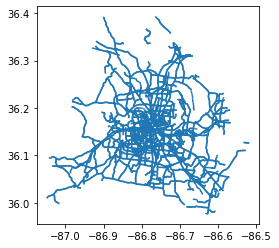

In [13]:
roads.plot()

In [14]:
roads.geometry # these are the line strings describing the road.

9033     LINESTRING (-86.75077 36.17116, -86.75076 36.1...
9045     LINESTRING (-86.77000 36.11989, -86.77046 36.1...
9051     LINESTRING (-86.77935 36.03619, -86.77935 36.0...
9055     LINESTRING (-86.75020 36.15446, -86.75019 36.1...
9056     LINESTRING (-86.71250 36.32843, -86.71272 36.3...
                               ...                        
94650    LINESTRING (-86.76221 36.16760, -86.76275 36.1...
94789    LINESTRING (-86.77707 36.12617, -86.77705 36.1...
94794    LINESTRING (-86.84079 36.15400, -86.84201 36.1...
94893    LINESTRING (-86.74435 36.14281, -86.74437 36.1...
95025    LINESTRING (-86.70474 36.12184, -86.70476 36.1...
Name: geometry, Length: 8641, dtype: geometry

In [15]:
# Lets read incident data

In [16]:
import pandas as pd

In [34]:
incidents=pd.read_parquet('nfd_incidents_xd_seg.parquet')

In [35]:
import shapely

In [36]:
incidents['geometry']=incidents.geometry.apply(shapely.wkt.loads)

In [37]:
incidents = gpd.GeoDataFrame(incidents,geometry=incidents.geometry)

In [38]:
incidents.head(2)

,ID_Original,latitude,longitude,emdCardNumber,time_utc,time_local,response_time_sec,day_of_week,weekend_or_not,geometry,Incident_ID,Dist_to_Seg,XDSegID
0,ObjectId(59d3a81908f47311c891f8e2),36.037228,-86.783243,29B5,2017-01-01 07:59:29.507,2017-01-01 01:59:29.507,268.0,6,1,POINT (-86.78324 36.03723),10,13.550370,1.524394e+09
1,ObjectId(59d3a81908f47311c891f8e6),36.037414,-86.786572,29D2P,2017-01-01 08:30:55.000,2017-01-01 02:30:55.000,512.0,6,1,POINT (-86.78657 36.03741),11,3.663952,1.524356e+09


<AxesSubplot:>

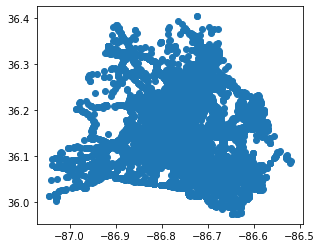

In [39]:
incidents.plot()

In [ ]:
#Read Weather. The Weather Data is defined by Weather Stations.

In [40]:
weather=pd.read_parquet('weatherbit_weather_2010_2022.parquet')

In [47]:
len(weather.station_id.unique())

194

In [52]:
distinctstations=weather[['station_id','gps_coordinate_latitude', 'gps_coordinate_longitude']].drop_duplicates().dropna()

In [53]:
distinctstations

,station_id,gps_coordinate_latitude,gps_coordinate_longitude
3912654,720259-63844,35.223,-83.419
1661538,720259-99999,35.223,-83.419
6967740,720264-63827,37.064,-81.798
1232754,720264-99999,37.067,-81.800
911166,720353-63875,36.611,-83.738
...,...,...,...
2572704,KSIK,36.899,-89.562
1983126,KSRB,36.056,-85.531
5252604,KTHA,35.380,-86.250
1500744,KUCY,36.380,-88.985


In [54]:
import plotly.express as px

In [58]:
fig = px.scatter_mapbox(distinctstations, lat="gps_coordinate_latitude", hover_name='station_id', lon="gps_coordinate_longitude", size_max=15, zoom=10,mapbox_style='open-street-map')


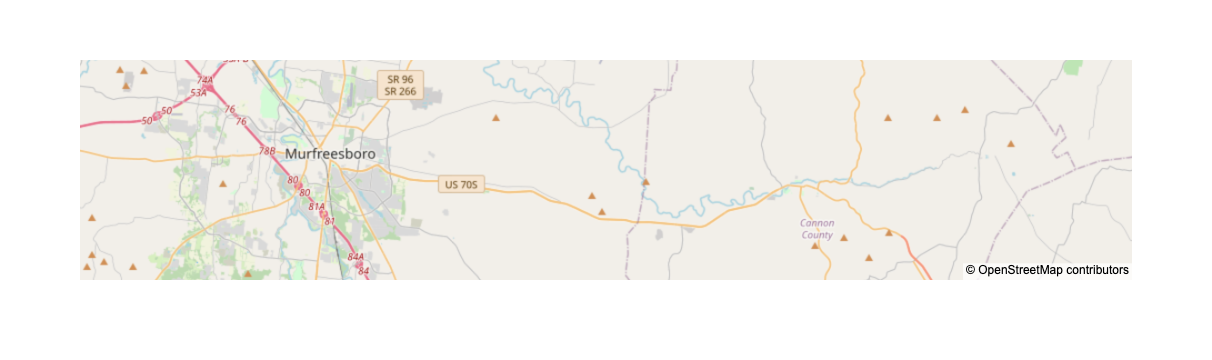

In [59]:
fig.show()

In [ ]:
#read traffic data #huge data -be careful

In [4]:
import pyarrow.parquet as pq

In [5]:
dataset = pq.ParquetDataset(
    'traffic.parquet/',         
    filters=[('year', '=', 2022)]
) # we are only loading 2022 data. With spark you can load more.

In [8]:
traffic = dataset.read().to_pandas()

In [9]:
traffic # measurement_tstamp is in local timezone

,xd_id,measurement_tstamp,measurement_tstamp_str,speed,average_speed,reference_speed,travel_time_seconds,confidence_score,cvalue,congestion,extreme_congestion,county,year,month
0,449575014,2022-01-16 22:10:00,2022-01-16 22:10:00,35.00,39.0,39.0,0.77,30.0,100.00,0.102564,0.102564,davidson,2022,1
1,160388958,2022-01-24 14:15:00,2022-01-24 14:15:00,29.58,17.0,17.0,27.71,30.0,90.00,0.000000,0.000000,davidson,2022,1
2,449575014,2022-01-16 22:15:00,2022-01-16 22:15:00,35.00,39.0,39.0,0.77,30.0,100.00,0.102564,0.102564,davidson,2022,1
3,160388958,2022-01-24 14:20:00,2022-01-24 14:20:00,29.00,17.0,17.0,28.26,30.0,90.00,0.000000,0.000000,davidson,2022,1
4,449575014,2022-01-16 22:20:00,2022-01-16 22:20:00,35.00,39.0,39.0,0.77,30.0,100.00,0.102564,0.102564,davidson,2022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120652381,396104099,2022-02-06 11:05:00,2022-02-06 11:05:00,37.00,37.0,34.0,34.26,30.0,100.00,0.000000,0.000000,davidson,2022,2
120652382,396104099,2022-02-06 11:10:00,2022-02-06 11:10:00,35.74,37.0,34.0,35.47,30.0,100.00,0.000000,0.034054,davidson,2022,2
120652383,396104099,2022-02-06 11:15:00,2022-02-06 11:15:00,34.39,37.0,34.0,36.86,30.0,100.00,0.000000,0.070541,davidson,2022,2
120652384,396104099,2022-02-06 11:20:00,2022-02-06 11:20:00,35.00,37.0,34.0,36.22,30.0,100.00,0.000000,0.054054,davidson,2022,2


In [10]:
#speed is the current speed #average is historical average and #reference is 95 percentile max speed